In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matricesAleatorias import matwishart as ws

In [11]:
from matplotlib.gridspec import GridSpec

In [2]:
N = 1000
T = 10000

In [3]:
mat = ws.MatrizWishart((N,T))

In [4]:
densidad = ws.Densidades((N,T),1000,1)

# Caso matriz muy grande

In [5]:
WOE = mat.WOE() #Se crea la matriz de wishart

In [6]:
EvalsWOE = np.linalg.eigvalsh(WOE)

In [7]:
x, y = densidad.MarchenkoPastur()

In [8]:
rWOE = (EvalsWOE[1:-1] - EvalsWOE[2:]) / (EvalsWOE[:-2] - EvalsWOE[1:-1])

In [62]:
r = np.linspace(0,10,1000)

In [63]:
pr = densidad.Pr(r)

Text(0.5, 1.0, 'Distribución $ P(r) $')

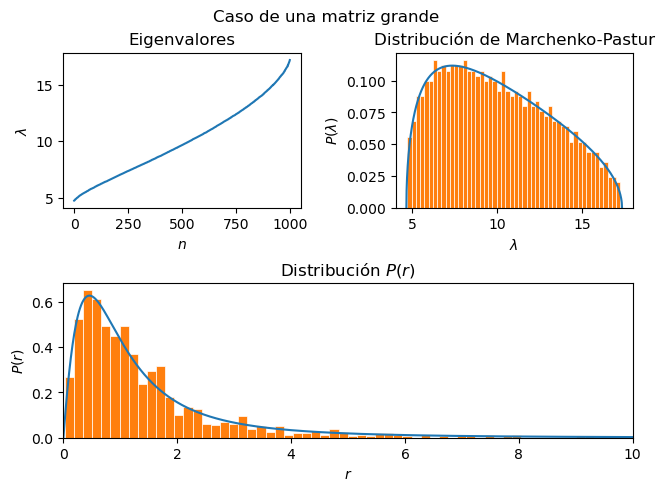

In [28]:
fig = plt.figure("""figsize=(12,10)""",layout="constrained")
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:])

fig.suptitle("Caso de una matriz grande")

ax1.plot(EvalsWOE)
ax1.set_title("Eigenvalores")
ax1.set_xlabel(r"$ n $")
ax1.set_ylabel(r"$ \lambda $")

ax2.plot(x,y)
ax2.hist(EvalsWOE,density=True,bins=50,linewidth=0.5,edgecolor="white")
ax2.set_xlabel(r"$ \lambda $")
ax2.set_ylabel(r"$ P(\lambda) $")
ax2.set_title("Distribución de Marchenko-Pastur")

ax3.plot(r,pr)
ax3.hist(rWOE,density=True,bins=300,linewidth=0.5,edgecolor="white")
ax3.set_xlim(0,10)
ax3.set_xlabel(r"$ r $")
ax3.set_ylabel(r"$ P(r) $")
ax3.set_title(r"Distribución $ P(r) $")

# Caso de un ensamble

In [44]:
nsamp = 100000
N = 100
T = 1000

In [45]:
ens = ws.MatrizWishart((N,T))
Eval = []

In [46]:
for i in range(nsamp):
    WOE = ens.WOE()
    eval = np.linalg.eigvalsh(WOE)
    Eval.append(eval)

In [47]:
Eval = np.concatenate(Eval)

In [74]:
np.savetxt("EvalsEnsaWOE.dat",Eval,delimiter=" ")

In [48]:
Eval.size

10000000

In [59]:
rens = []

In [60]:
for i in range(int(nsamp / N)):
    EvalSamp = Eval[0 + i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [61]:
rens = np.concatenate(rens)

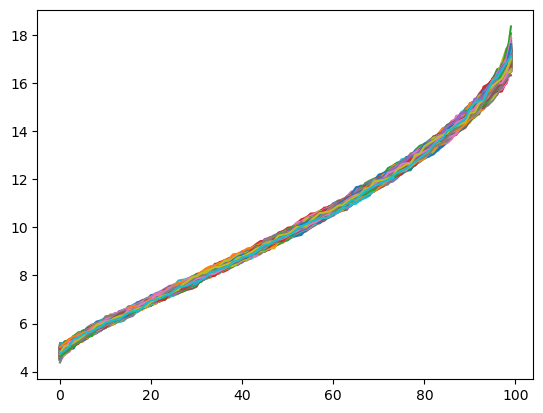

In [52]:
plt.figure()

for i in range(int(nsamp / N)):
    plt.plot(Eval[0+i*100:100 + i*100])

plt.show()

Text(0, 0.5, '$ P(r) $')

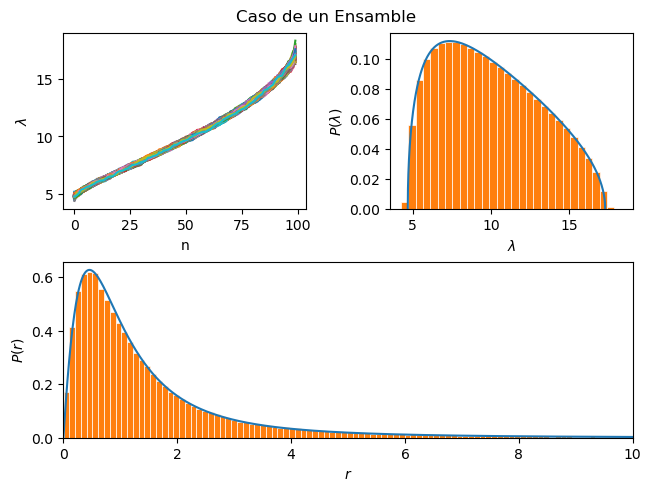

In [73]:
fig = plt.figure("""figsize=(12,10)""",layout="constrained")
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:])
fig.suptitle("Caso de un Ensamble")

for i in range(int(nsamp / N)):
    ax1.plot(Eval[0+ i*100:100 + i*100])

ax1.set_xlabel("n")
ax1.set_ylabel(r"$ \lambda $")

ax2.plot(x, y)
ax2.hist(Eval, density=True, bins=30, linewidth=0.5, edgecolor="white")
ax2.set_xlabel(r"$ \lambda $")
ax2.set_ylabel(r"$ P(\lambda) $")

ax3.plot(r,pr)
ax3.hist(rens, density=True, bins=7000, linewidth=0.5, edgecolor="white")
ax3.set_xlim(0,10)
ax3.set_xlabel(r"$ r $")
ax3.set_ylabel(r"$ P(r) $")